# L3: Multimodal Requests & Streaming

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
from anthropic import Anthropic

In [ ]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

In [3]:
client = Anthropic()
MODEL_NAME="claude-3-5-sonnet-20241022"

## Content Blocks

In [4]:
messages = [
    {
        "role": "user",
        "content": "tell me a joke"
    }
]

response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

Here's a classic one:

Why don't scientists trust atoms?
Because they make up everything! 😄


<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [5]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "tell me a joke"},
        ]
    }
]

response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

Here's a classic one:

Why don't scientists trust atoms?
Because they make up everything! 😄


In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "who"},
            {"type": "text", "text": "made"},
            {"type": "text", "text": "you?"},
        ]
    }
]
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

I'm Claude, an AI assistant created by Anthropic. I aim to be direct and honest about this.


## Image Prompts

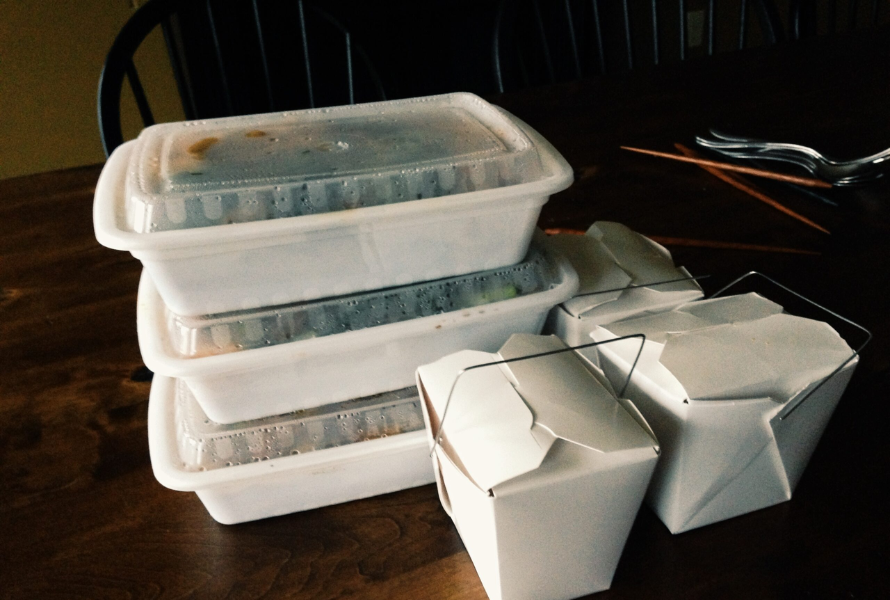

In [8]:
from IPython.display import Image
Image(filename='images/food.png') 

## Image Messages

In [9]:
import base64
# opens the image file in "read binary" mode
with open("images/food.png", "rb") as image_file:
    #reads the contents of the image as a bytes object
    binary_data = image_file.read() 
    #encodes the binary data using Base64 encoding
    base_64_encoded_data = base64.b64encode(binary_data) 
    #decodes base_64_encoded_data from bytes to a string
    base64_string = base_64_encoded_data.decode('utf-8')

In [10]:
base64_string[:100]

'iVBORw0KGgoAAAANSUhEUgAAA3oAAAJYCAYAAAA0QJTxAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAAPHRFWHRDb21tZW50AHhyOmQ6'

In [11]:
messages = [
    {
        "role": "user",
        "content": [{
            "type": "image",
            "source": {
                "type": "base64",
                "media_type": "image/png",
                "data": base64_string
            },
        },
        {
            "type": "text",
            "text": """How many to-go containers of each type 
            are in this image?"""
        }]
    }
]

In [12]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

In this image, there are:
- 3 rectangular plastic containers with clear lids (stacked on top of each other)
- 3 white paper/cardboard takeout boxes (the folded type commonly used for Chinese food)

The plastic containers appear to have some condensation on their lids, suggesting they might contain hot food. They're sitting on what looks like a dark wooden table or surface.


## Image Block Helper Function

In [13]:
import base64
import mimetypes

def create_image_message(image_path):
    # Open the image file in "read binary" mode
    with open(image_path, "rb") as image_file:
        # Read the contents of the image as a bytes object
        binary_data = image_file.read()
    # Encode the binary data using Base64 encoding
    base64_encoded_data = base64.b64encode(binary_data)
    # Decode base64_encoded_data from bytes to a string
    base64_string = base64_encoded_data.decode('utf-8')
    # Get the MIME type of the image based on its file extension
    mime_type, _ = mimetypes.guess_type(image_path)
    # Create the image block
    image_block = {
        "type": "image",
        "source": {
            "type": "base64",
            "media_type": mime_type,
            "data": base64_string
        }
    }
    
    
    return image_block

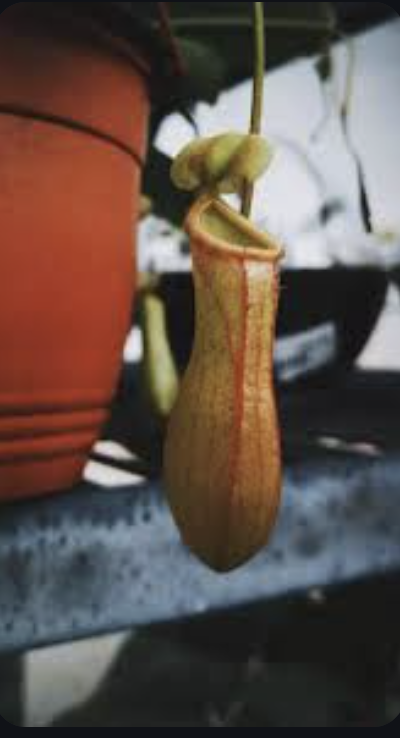

In [14]:
Image("images/plant.png")

In [15]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message("./images/plant.png"),
            {"type": "text", "text": "What species is this?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=messages
)
print(response.content[0].text)

This appears to be a Nepenthes (Tropical Pitcher Plant), which is a carnivorous plant. The image shows the distinctive pitcher-shaped trap that these plants use to catch and digest insects. The coloring appears to be a yellowish-tan with reddish veining, which is typical for many Nepenthes species. Though without more detailed views of the plant and its specific characteristics, it would be difficult to identify the exact species within the Nepenthes genus.

These fascinating plants are known for luring insects into their pitcher-shaped traps using nectar and bright colors. Once inside, the insects cannot escape due to the slippery walls and downward-pointing hairs, and they eventually fall into a pool of digestive enzymes at the bottom of the pitcher.


## A Real World Use Case

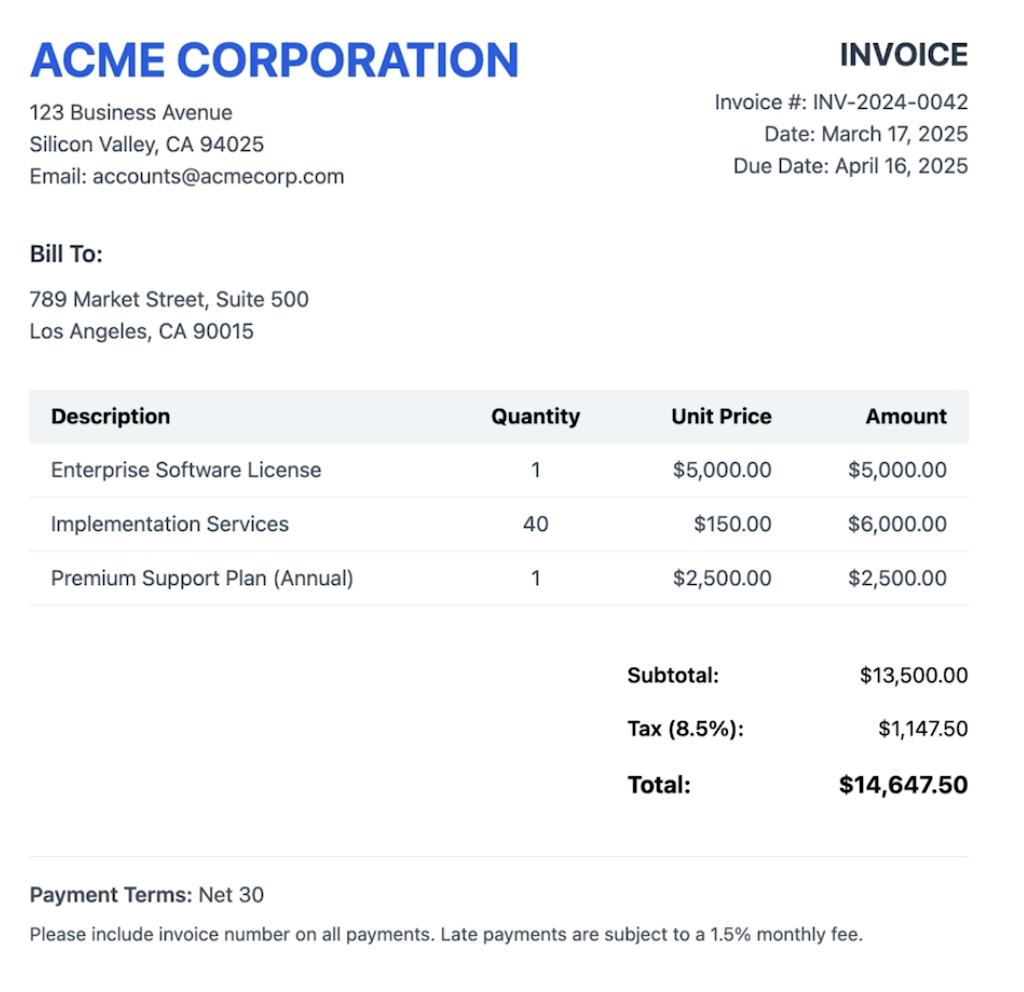

In [16]:
Image(filename='images/invoice.png') 

In [17]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message("./images/invoice.png"),
            {"type": "text", "text": """
                Generate a JSON object representing the contents
                of this invoice.  It should include all dates,
                dollar amounts, and addresses. 
                Only respond with the JSON itself.
            """
            }
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=messages
)
print(response.content[0].text)

{
  "invoiceNumber": "INV-2024-0042",
  "issueDate": "March 17, 2025",
  "dueDate": "April 16, 2025",
  "from": {
    "company": "ACME CORPORATION",
    "address": "123 Business Avenue",
    "city": "Silicon Valley",
    "state": "CA",
    "zip": "94025",
    "email": "accounts@acmecorp.com"
  },
  "billTo": {
    "address": "789 Market Street, Suite 500",
    "city": "Los Angeles",
    "state": "CA",
    "zip": "90015"
  },
  "items": [
    {
      "description": "Enterprise Software License",
      "quantity": 1,
      "unitPrice": 5000.00,
      "amount": 5000.00
    },
    {
      "description": "Implementation Services",
      "quantity": 40,
      "unitPrice": 150.00,
      "amount": 6000.00
    },
    {
      "description": "Premium Support Plan (Annual)",
      "quantity": 1,
      "unitPrice": 2500.00,
      "amount": 2500.00
    }
  ],
  "subtotal": 13500.00,
  "taxRate": 8.5,
  "taxAmount": 1147.50,
  "total": 14647.50,
  "paymentTerms": "Net 30",
  "lateFee": "1.5% monthly"

## Streaming

In [ ]:
response = client.messages.create(
    max_tokens=1024,
    messages=[{"role": "user", "content": "write a poem"}],
    model=MODEL_NAME,
)
print(response.content[0].text)

In [ ]:
with client.messages.stream(
    max_tokens=1024,
    messages=[{"role": "user", "content": "write a poem"}],
    model=MODEL_NAME,
) as stream:
  for text in stream.text_stream:
      print(text, end="", flush=True)

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Computer Use Code:</b> The computer use code shown at the end of the video is not part of this lab. This code will also be reviewed step by step in the next lessons, and finally, you will see it in detail in the "Computer Use" lesson.</p>